# Re Evaluate the data

In [1]:
import sys
sys.path.insert(0, '../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import modules.missing as ms
import warnings
warnings.filterwarnings('ignore')

In [2]:
app_train = pd.read_csv('../data/application_train_cleaned.csv')
bb = pd.read_csv('../data/bureau_balance.csv')
bureau = pd.read_csv('../data/bureau_clean.csv')
ccb = pd.read_csv('../data/credit_card_balance_clean.csv')
installments = pd.read_csv('../data/installments_payments_clean.csv')
pos_cash = pd.read_csv('../data/pos_cash_balance_clean.csv')
previous = pd.read_csv('../data/previous_application_clean.csv')

bb aggragate to show average MONTHS_BALANCE()

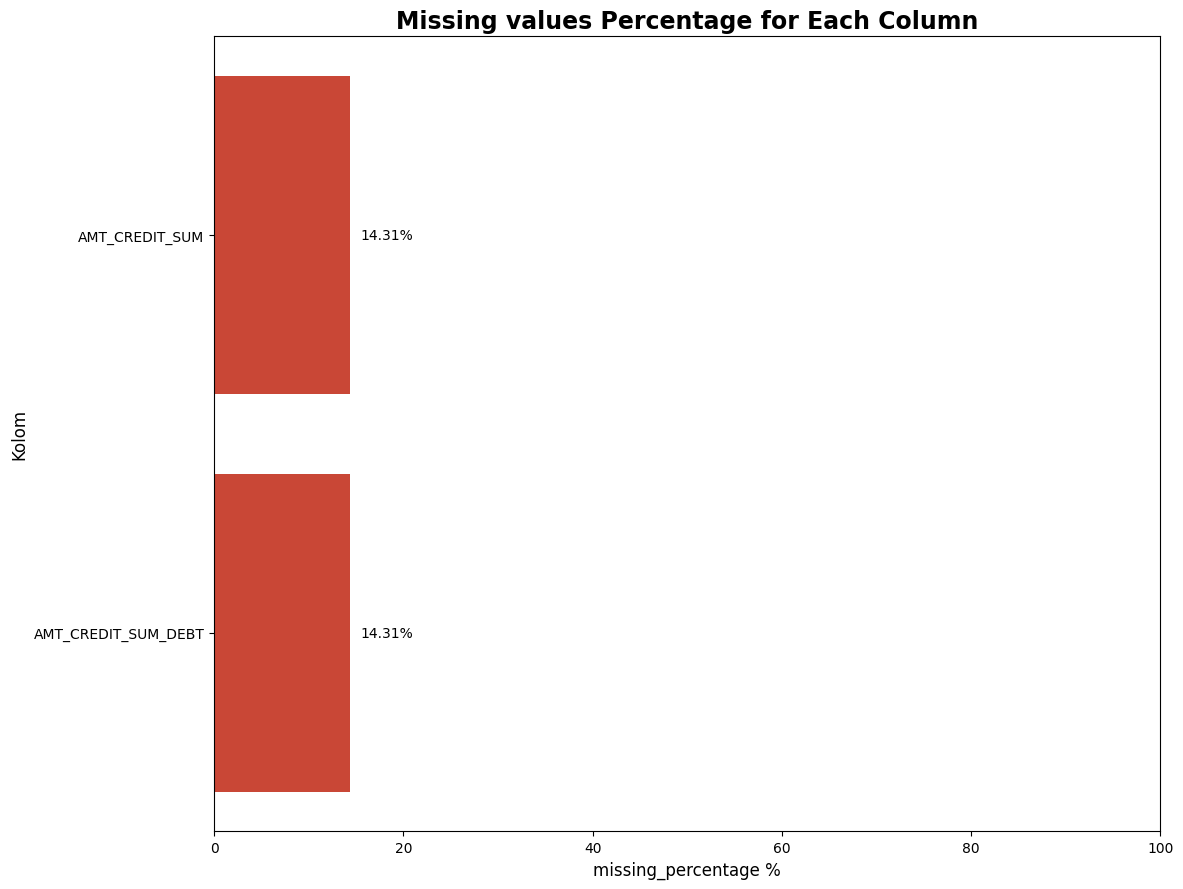

In [39]:
bb_agg = bb.groupby('SK_ID_BUREAU')['MONTHS_BALANCE'].mean().reset_index(name='AVG_MONTHS_BALANCE')

bureau_semi_join = pd.merge(bureau, bb_agg, on='SK_ID_BUREAU', how='left')
bureau_agg = bureau_semi_join.groupby('SK_ID_CURR')[['AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT']].sum().reset_index()

train_bureau = pd.merge(app_train, bureau_agg, on='SK_ID_CURR', how='left')
ms.plot_missing_percentage(train_bureau)

In [19]:
bb_agg

,SK_ID_BUREAU,AVG_MONTHS_BALANCE
0,5001709,-48.0
1,5001710,-41.0
2,5001711,-1.5
3,5001712,-9.0
4,5001713,-10.5
...,...,...
817390,6842884,-23.5
817391,6842885,-11.5
817392,6842886,-16.0
817393,6842887,-18.0


In [9]:
p_pos = pd.merge(previous, pos_cash, on='SK_ID_PREV', how='inner')
p_cb = pd.merge(previous, ccb, on='SK_ID_PREV', how='inner')
p_full = pd.merge(p_pos, p_cb, on='SK_ID_PREV', how='inner')

In [25]:
# Join previous_application based on SK_ID_CURR
joined_prev = app_train.merge(previous, on="SK_ID_CURR", how="left")

# Join behavioral data
joined_pcb = joined_prev.merge(
    pos_cash, on=["SK_ID_CURR", "SK_ID_PREV"], how="left"
)

joined_ccb = joined_pcb.merge(
    ccb, on=["SK_ID_CURR", "SK_ID_PREV"], how="left"
)

# Join installments data
joined_installments = joined_ccb.merge(
    installments, on=["SK_ID_CURR", "SK_ID_PREV"], how="left"
)

# Join bureau data
bureau_join = bureau.merge(bb, on="SK_ID_BUREAU", how="left")

joined_data = joined_installments.merge(
    bureau_join, on="SK_ID_CURR", how="left"
)

MemoryError: Unable to allocate 54.4 GiB for an array with shape (28, 260816731) and data type float64

In [18]:
joined_data.shape

(8912295, 96)

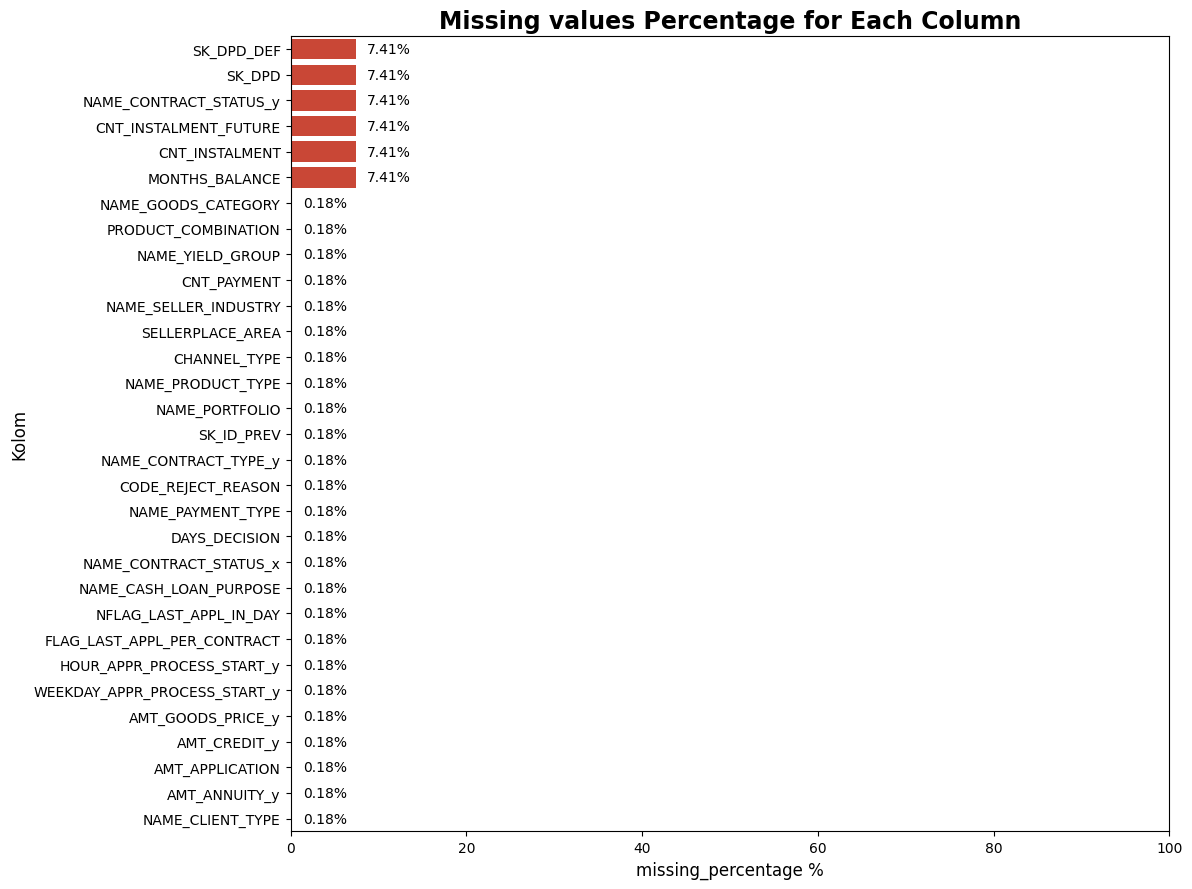

In [24]:
ms.plot_missing_percentage(joined_data)

In [22]:
# Join previous_application based on SK_ID_CURR
joined_data = app_train.merge(previous, on="SK_ID_CURR", how="left")

# Join behavioral data
joined_data = joined_data.merge(
    pos_cash, on=["SK_ID_CURR", "SK_ID_PREV"], how="left"
)

MemoryError: Unable to allocate 191. MiB for an array with shape (15, 1670214) and data type object

In [ ]:
joined_data.shape

In [5]:
p_full.shape

(13096669, 80)

In [10]:
p_pos.shape

(9660797, 33)

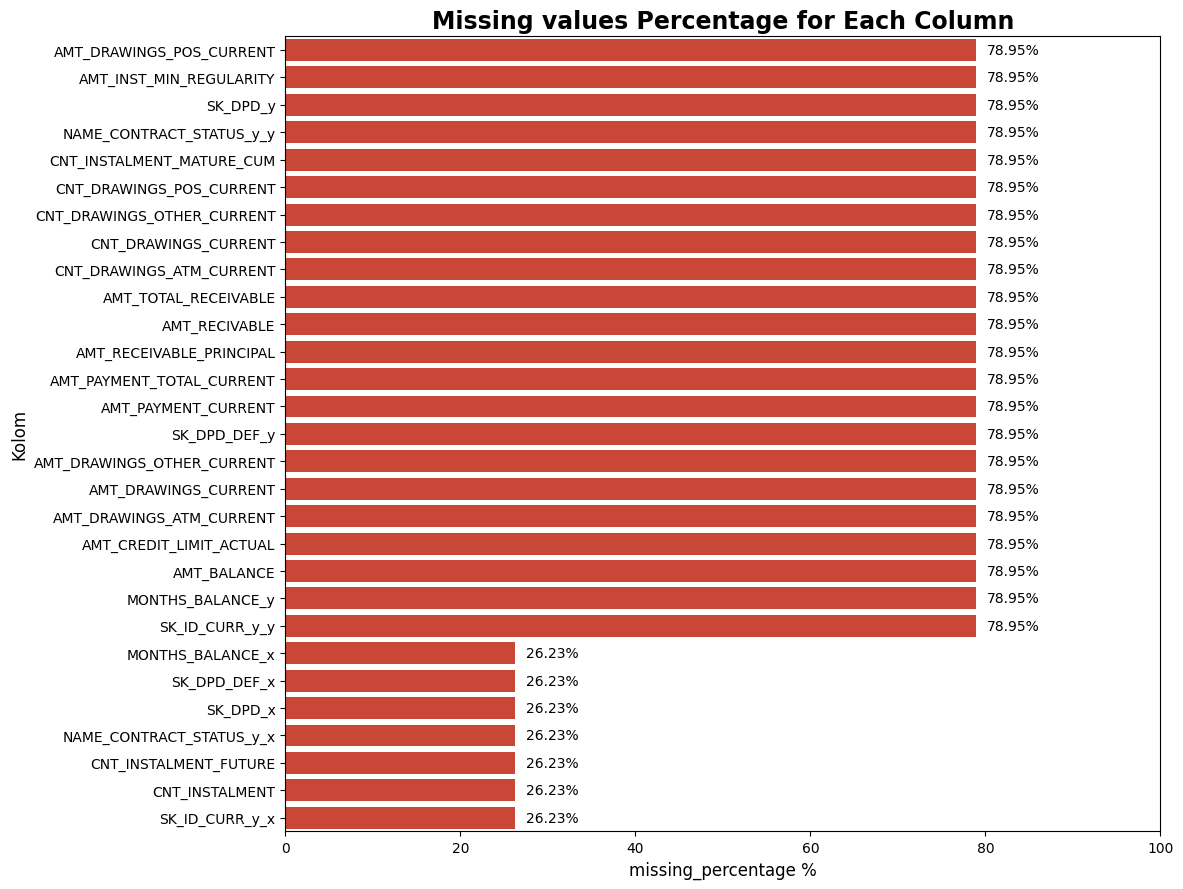

In [6]:
ms.plot_missing_percentage(p_full)